# A macroeconomic analysis of global commodities trade

The goal of this notebook is to practice using Pandas and Matplotlib for data analysis. I've processed data obtained from the [UN Data portal](http://data.un.org) including global GDP growth rates, commodities export values, and annual interest rates of several countries from 1992 to 2016.

The following indicators are investigated:

- Annual global GDP of countries (in US Dollar values)
- Total annual commodities exports of countries (in US Dollar values)

## 1. Importing and processing the data sets

The raw data is imported into Pandas DataFrames from CSV files. The DataFrames are processed to make sure that there are no missing or unnecessary values that can affect the calculations.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_GDP = pd.read_csv('/Users/Badran/Downloads/UNdata_GDP_By_Expenditure.csv')
df_all_comm = pd.read_csv('/Users/Badran/Downloads/UNdata_Cm.csv')

### A) GDP Data
The [GDP by Type of Expenditure at current prices - US dollars](http://data.un.org/Data.aspx?q=gdp&d=SNAAMA&f=grID%3a101%3bcurrID%3aUSD%3bpcFlag%3a0) file provides several annual economic indicators for each country, expressed in total current US Dollar values.

Pandas expresses the GDP values in scientific notation. As a rule of thumb, the exponent values (the numbers after the 'e+' sign), can be thought of as the "amount of number places that have been shifted to the left". For example, Afghanistan's 2015 GPD value is 2.027006e+10, or US$ 20,270,060,000 (just over twenty billion US dollars).

There are several different items in the *"Item"* column. I only want the *"Gross Domestic Product (GDP)"* values, so I've filtered the value to a variable called "GDP". The variable will be stored in the computer's memory.

Below, the first three lines of the DataFrame are printed with the *pd.head()* method.

In [3]:
GDP = df_GDP.loc[lambda df: df_GDP['Item']=='Gross Domestic Product (GDP)', :]
GDP.head(3)

,Country or Area,Year,Item,Value
7,Afghanistan,2015,Gross Domestic Product (GDP),2.027006e+10
15,Afghanistan,2014,Gross Domestic Product (GDP),2.112349e+10
23,Afghanistan,2013,Gross Domestic Product (GDP),2.161037e+10


To be on the safe side, I've inspected the unique values in each column to make sure that they are as expected. This was done by iterating over each column and extracting their unique values using Panda's *df.unique()* function. I've also printed the number of countries in the dataset, and the maximum and minimum GDP values.

In [4]:
unique_list = []
for col in GDP:
    unique_list.append(GDP[col].unique())

print("Total number of countries = ", len(unique_list[0]))
unique_list

Total number of countries =  220


[array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
        'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
        'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
        'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
        'Bermuda', 'Bhutan', 'Bolivia (Plurinational State of)',
        'Bosnia and Herzegovina', 'Botswana', 'Brazil',
        'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
        'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
        'Canada', 'Cayman Islands', 'Central African Republic', 'Chad',
        'Chile', 'China, Hong Kong SAR',
        'China, Macao Special Administrative Region',
        "China, People's Republic of", 'Colombia', 'Comoros', 'Congo',
        'Cook Islands', 'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba',
        'Curaçao', 'Cyprus', 'Czech Republic',
        "Democratic People's Republic of Korea",
        'Democratic Republic of the Congo', 'D

In [5]:
max_GDP = GDP[GDP['Value'] == GDP['Value'].max()]
max_GDP

,Country or Area,Year,Item,Value
77373,United States,2015,Gross Domestic Product (GDP),1.803665e+13


In [6]:
min_GDP = GDP[GDP['Value'] == GDP['Value'].min()]
min_GDP

,Country or Area,Year,Item,Value
75243,Tuvalu,1970,Gross Domestic Product (GDP),2.585174e+06


Here I filtered the twenty largest economies in 2015, using Pandas df.nlargest() method:

In [7]:
twenty_largest_economies = GDP.loc[lambda df: GDP['Year']==2015, :].nlargest(20, 'Value')
twenty_largest_economies

,Country or Area,Year,Item,Value
77373,United States,2015,Gross Domestic Product (GDP),1.803665e+13
16336,"China, People's Republic of",2015,Gross Domestic Product (GDP),1.115846e+13
37563,Japan,2015,Gross Domestic Product (GDP),4.383076e+12
29064,Germany,2015,Gross Domestic Product (GDP),3.363600e+12
76311,United Kingdom of Great Britain and Northern I...,2015,Gross Domestic Product (GDP),2.858003e+12
27229,France,2015,Gross Domestic Product (GDP),2.418946e+12
34263,India,2015,Gross Domestic Product (GDP),2.116239e+12
36735,Italy,2015,Gross Domestic Product (GDP),1.821580e+12
9832,Brazil,2015,Gross Domestic Product (GDP),1.772591e+12
13493,Canada,2015,Gross Domestic Product (GDP),1.552808e+12


In [8]:
twenty_largest_economies['Country or Area'] = ['USA', "China", 'Japan', 'Germany', 'United Kingdom', 'France', 'India', 'Italy', 'Brazil', 'Canada','Republic of Korea',
 'Russian Federation', 'Australia', 'Spain', 'Mexico', 'Indonesia', 'Netherlands', 'Turkey', 'Switzerland', 'Saudi Arabia']
twenty_largest_economies

,Country or Area,Year,Item,Value
77373,USA,2015,Gross Domestic Product (GDP),1.803665e+13
16336,China,2015,Gross Domestic Product (GDP),1.115846e+13
37563,Japan,2015,Gross Domestic Product (GDP),4.383076e+12
29064,Germany,2015,Gross Domestic Product (GDP),3.363600e+12
76311,United Kingdom,2015,Gross Domestic Product (GDP),2.858003e+12
27229,France,2015,Gross Domestic Product (GDP),2.418946e+12
34263,India,2015,Gross Domestic Product (GDP),2.116239e+12
36735,Italy,2015,Gross Domestic Product (GDP),1.821580e+12
9832,Brazil,2015,Gross Domestic Product (GDP),1.772591e+12
13493,Canada,2015,Gross Domestic Product (GDP),1.552808e+12


### B) Commodities Export Data
The commodities data is pretty straightforward. It was obtained from the [Trade of Goods, All Commodities](http://data.un.org/Data.aspx?q=commodities&d=ComTrade&f=_l1Code%3a1) file from the UN Data Portal. Total commodities exports, imports, re-exports, and re-imports are provided by year, by country. I've filtered the rows containing 'Export', and removed other unnecessary columns:

In [9]:
export_data = df_all_comm.loc[lambda df: df_all_comm['Flow']=='Export', :'Trade (USD)']
export_data

,Country or Area,Year,Comm. Code,Commodity,Flow,Trade (USD)
1,Afghanistan,2016,TOTAL,ALL COMMODITIES,Export,596455337
3,Afghanistan,2015,TOTAL,ALL COMMODITIES,Export,571404967
5,Afghanistan,2014,TOTAL,ALL COMMODITIES,Export,570534007
7,Afghanistan,2013,TOTAL,ALL COMMODITIES,Export,514972983
9,Afghanistan,2012,TOTAL,ALL COMMODITIES,Export,428902710
11,Afghanistan,2011,TOTAL,ALL COMMODITIES,Export,375850935
13,Afghanistan,2010,TOTAL,ALL COMMODITIES,Export,388483635
15,Afghanistan,2009,TOTAL,ALL COMMODITIES,Export,403441006
17,Afghanistan,2008,TOTAL,ALL COMMODITIES,Export,540065594
19,Albania,2016,TOTAL,ALL COMMODITIES,Export,1962117416


In [10]:
export_data = export_data.drop(['Comm. Code', 'Flow', 'Commodity'],axis=1)
export_data

,Country or Area,Year,Trade (USD)
1,Afghanistan,2016,596455337
3,Afghanistan,2015,571404967
5,Afghanistan,2014,570534007
7,Afghanistan,2013,514972983
9,Afghanistan,2012,428902710
11,Afghanistan,2011,375850935
13,Afghanistan,2010,388483635
15,Afghanistan,2009,403441006
17,Afghanistan,2008,540065594
19,Albania,2016,1962117416


Since the data came from a different CSV document, I once again inspected the unique values in each column to make sure that they are as expected. I've also printed the minimum and maximum values on the *Trade (USD)* column. Just to practice, this time I've used a list comprehension instead of a for loop:

In [11]:
unique_list = [(export_data[col].unique()) for col in export_data]
print("Total number of countries = ", len(unique_list[0]))
unique_list

Total number of countries =  206


[array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
        'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
        'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
        'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
        'Belgium-Luxembourg', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
        'Bolivia (Plurinational State of)', 'Bosnia Herzegovina',
        'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
        'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
        'Canada', 'Central African Rep.', 'Chile', 'China',
        'China, Hong Kong SAR', 'China, Macao SAR', 'Colombia', 'Comoros',
        'Congo', 'Cook Isds', 'Costa Rica', "Côte d'Ivoire", 'Croatia',
        'Cuba', 'Cyprus', 'Czech Rep.', 'Denmark', 'Djibouti', 'Dominica',
        'Dominican Rep.', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea',
        'Estonia', 'Ethiopia', 'EU-28', 'Faeroe Isds', 'Fiji', 'Finland',
        'Fmr Fed. Rep. of Germany'

In [12]:
max_trade_value = export_data[export_data['Trade (USD)'] == export_data['Trade (USD)'].max()]
max_trade_value

,Country or Area,Year,Trade (USD)
1755,China,2014,2342292696320


In [13]:
min_trade_value = export_data[export_data['Trade (USD)'] == export_data['Trade (USD)'].min()]
min_trade_value

,Country or Area,Year,Trade (USD)
8544,Tuvalu,2005,62431


## 2. Plotting the data with Matplotlib

Now that the data has been processed, I will generate the following plots:

- Bar plot of the GDP values of the twenty countries with the largest economies in 2015
- Line plot of commodities exports of the twenty largest economies from 1995 to 2016

The bar chart of the 20 largest economies will be displayed horizontally to better show the country names:

Text(0.5,1,'10 largest economies in 2015 - GDP in USD values')

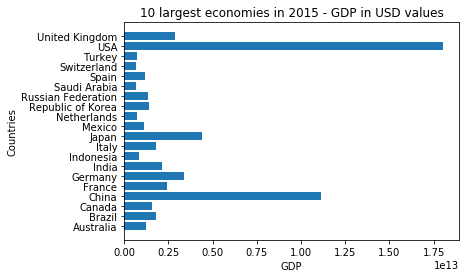

In [14]:
#plt.ticklabel_format(style='plain')
plt.barh(twenty_largest_economies['Country or Area'], twenty_largest_economies['Value'])
plt.ylabel('Countries')
plt.xlabel('GDP')
plt.title('10 largest economies in 2015 - GDP in USD values')

To generate the next plot, I'll first create a dictionary with data frames of the total export values of each of the twenty countries with the largest economies:

In [15]:
DataFrameDict = {i : pd.DataFrame for i in twenty_largest_economies['Country or Area']}

for key in DataFrameDict.keys():
    DataFrameDict[key] = export_data[:][export_data['Country or Area'] == key]

DataFrameDict['China'][['Year','Trade (USD)']]

,Year,Trade (USD)
1750,2016,2097637171895
1752,2015,2273468224113
1755,2014,2342292696320
1758,2013,2209007280259
1761,2012,2048782233084
1764,2011,1898388434783
1767,2010,1577763750888
1770,2009,1201646758080
1773,2008,1430693066080
1776,2007,1220059668452


Now I'll generate a the plot with multiple lines using a for loop:

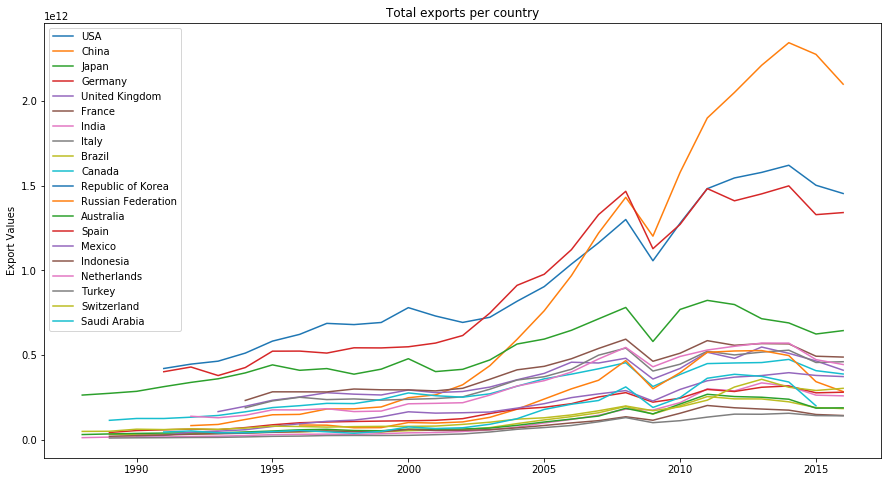

In [16]:
plt.figure(figsize=(15, 8))
for i in twenty_largest_economies['Country or Area']:
    exports_plot = plt.plot(DataFrameDict[i]['Year'],DataFrameDict[i]['Trade (USD)'], label='{}'.format(i))

plt.ylabel('Export Values')
plt.title('Total exports per country')
plt.legend()